# Project Proposal

## Introduction

As more learning across the world shifts from in-person to online, educators are being forced to adapt to this new environment. With this change comes many new challenges, one of which is supporting students individual needs sufficiently. One possible remedy to this problem is user knowledge models. These models classify a student’s knowledge level based on their dynamic data, data which outlines the behaviors of students with respect to learning. Thus with access to the knowledge level of each of their students, educators can accommodate them accordingly and efficiently. 

In the case of our user knowledge model, knowledge levels are divided into four categories (Very Low, Low, Middle and High) and dynamic data is divided into five variables (The degree of study time for goal object materials (STG), The degree of repetition number of user for goal object materials (SCG), The degree of study time of user for related objects with goal objects (STR), The exam performance of user for related objects with goal objects (LPR) and The exam performance of user for goal objects (PEG)).

This brings us to the question we are looking to answer, which is: Which variables influence knowledge level the most? To answer said question, we will be using the User Knowledge Modelling Data Set. This data set contains 258 rows, 6 variables and no missing values.


In [32]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
install.packages("psych")
library(psych)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Preliminary exploratory data analysis
The given data is already split into training data and testing data, but in excel format. For the purpose of reading from URL's, we converted the data files locally using **write.csv()**, and then uploaded to Github repository. Then, we read them to objects 'train_data' and 'test_data' using **read_csv()**.

In [33]:
# show data can be read
train_data <- read_csv("https://raw.githubusercontent.com/fyang1419/group-56-project/main/train_data.csv") |>
select(STG:UNS)
test_data <- read_csv("https://raw.githubusercontent.com/fyang1419/group-56-project/main/test_data.csv") |>
select(STG:UNS)
              
slice(train_data, 1:6)
slice(test_data, 1:6)

New names:
• `` -> `...1`
• `...7` -> `...8`
• `...8` -> `...9`
Rows: 258 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (6): ...1, STG, SCG, STR, LPR, PEG
lgl (2): ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
• `...7` -> `...8`
• `...8` -> `...9`
Rows: 145 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (6): ...1, STG, SCG, STR, LPR, PEG
lgl (2): ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


The dataset is already tidy. The only adjustment we need to make is to change the target variable's (UNS) character type to a factor type for both testing and training data.

In [28]:
#tidy data: turn UNS into factors in both sets of data
train_data <- train_data |>
mutate(UNS = as_factor(UNS))

test_data <- test_data |>
mutate(UNS = as_factor(UNS))

slice(train_data, 1:6)
slice(test_data, 1:6)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


For our exploratory data analysis, we summarize the data of the predictors into one table using **describe()** from the package **psych**, which presents each variable's length, mean, standard deviation, min value, max value, range, and standard error. We also summarized the number of observations for each level in the target variable UNS.

In [29]:
#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

UNS_count <- train_data |>
group_by(UNS) |>
    summarise(count = n())
UNS_count

,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STG,1,258,0.3711473,0.2102712,0,0.99,0.99,0.01309091
SCG,2,258,0.3556744,0.2119623,0,0.90,0.90,0.01319620
STR,3,258,0.4680039,0.2459398,0,0.95,0.95,0.01531154
LPR,4,258,0.4327132,0.2481080,0,0.99,0.99,0.01544653
PEG,5,258,0.4585388,0.2552109,0,0.93,0.93,0.01588874


UNS,count
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


Considering that all predictors in the training dataset are continuous variables, we created individual histograms to display their distributions. After experimenting with several values of bins, we found bins=30 to be most clear in presentation. Looking at the plots below, distributions for STG and SCG are most smooth, while STR has the most noise. 

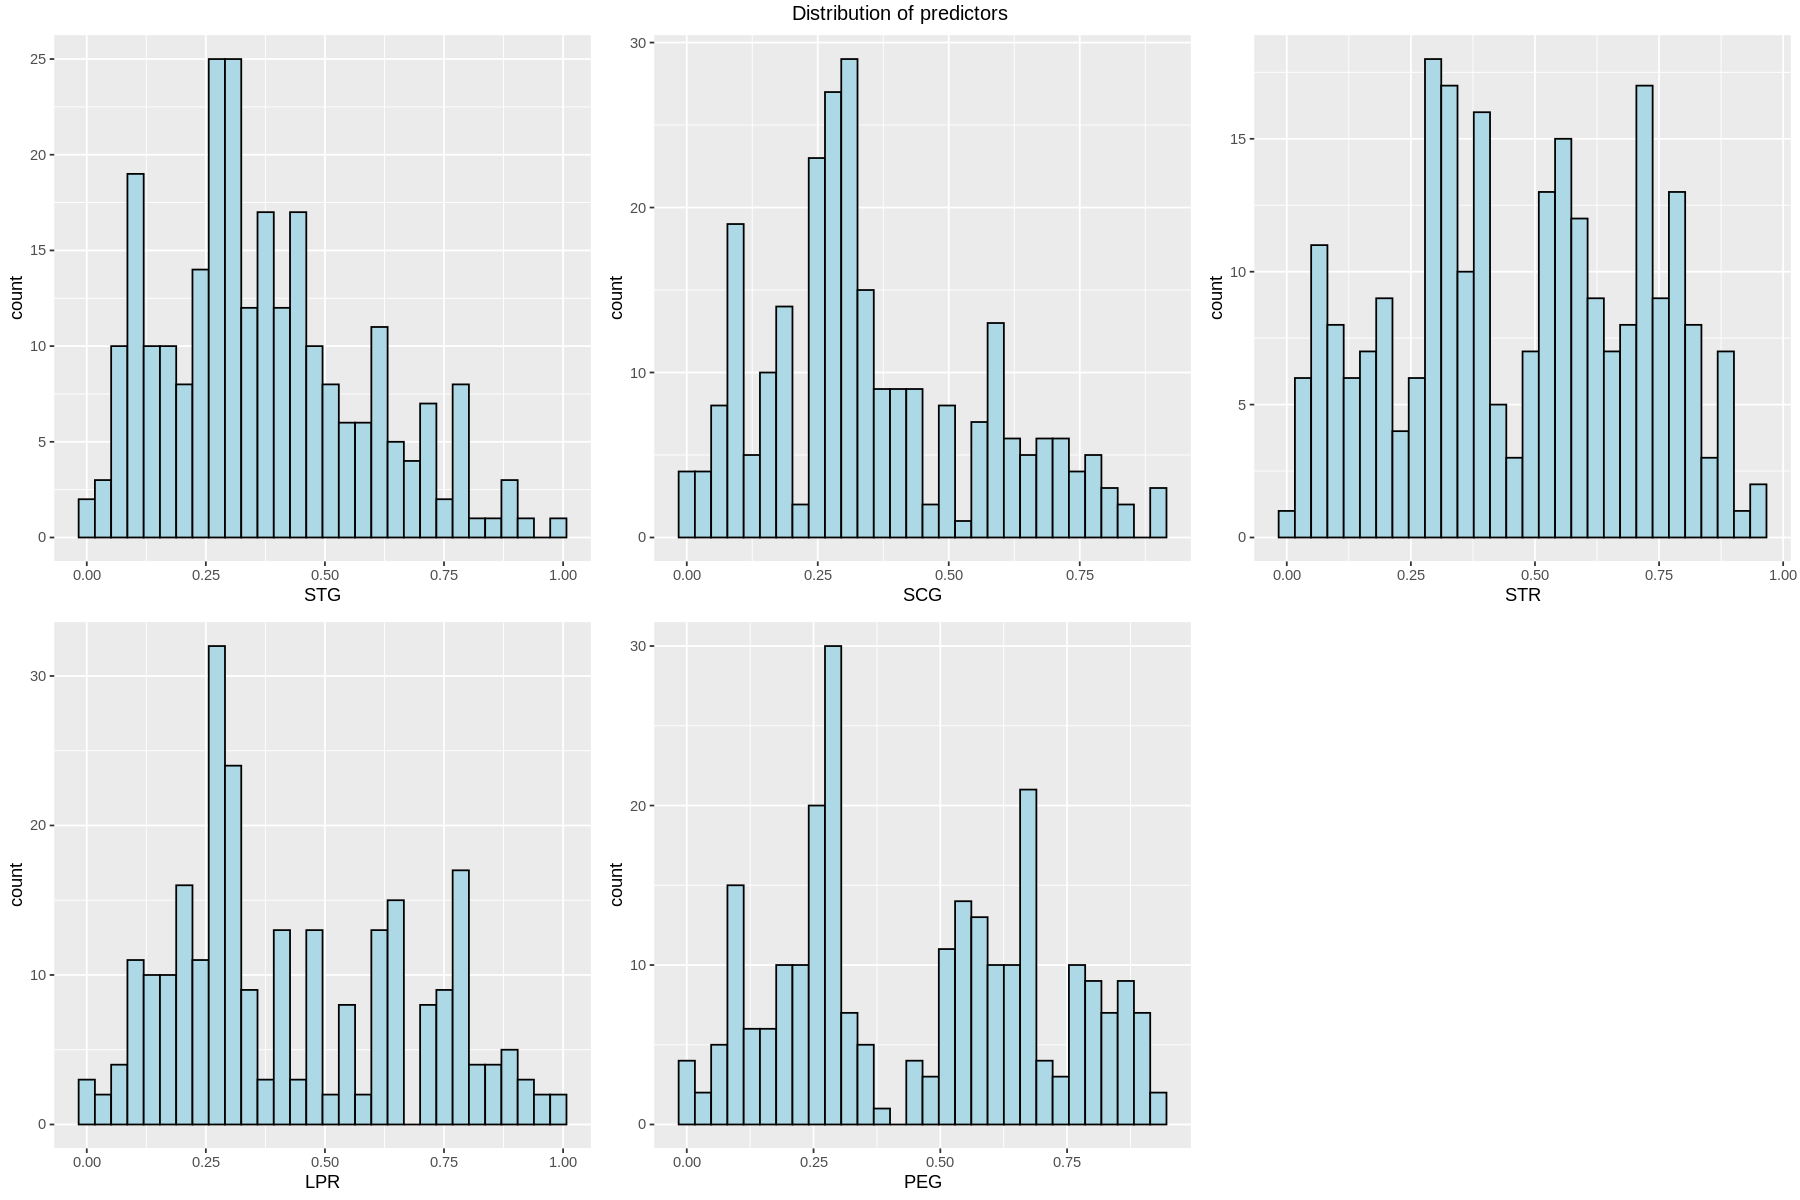

In [34]:
options(repr.plot.width = 15, repr.plot.height = 10)
prawSTG <- ggplot(train_data, aes(STG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSCG <- ggplot(train_data, aes(SCG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSTR <- ggplot(train_data, aes(STR))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawLPR <- ggplot(train_data, aes(LPR))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawPEG <- ggplot(train_data, aes(PEG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

grid.arrange(prawSTG, prawSCG, prawSTR, prawLPR, prawPEG, ncol=3, top="Distribution of predictors")

## Methods

We chose to use the following 3 predictors only: the degree of study time for goal object materials (STG), the degree of repetition number of user for goal object materials (SCG), and the exam performance of user for goal objects (PEG). We assume that these predictors have more direct effects on the goal objects, while other predictors of related subjects have less effects. 

We will build predictive models through the K-nearest neighbor classification algorithm, and evaluate to find the accuracy-maximizing classifier. Our methods involve:
- Create a recipe to centre and scale data.
- Cross-validate and tune the classifier and  to find appropriate number of neighbors.
- Create a model followed by workflow to fit the training data.
- Filter out accuracies and plot against the number of neighbours.
- Other than the line plot of accuracies vs. number of neighbours, we can also create scatterplot of predictor variables and color the points by outcome level. 




## Expected outcome and significance

By taking a quick glance at the dataset, it seems as though the exam performance of users for goal objects has the largest impact on knowledge level. However it’s important we perform a proper analysis of the dataset to confirm this theory. Whichever variable impacts knowledge level the most, identifying it can help us determine the best way to increase knowledge level and thus help students the most.

By answering our first question, others relevant to the data set might appear. Some of these might be: Do variables of the data set not only affect knowledge level but also each other? Is knowledge level a sufficient way to classify students intelligence? What is the best routine to optimize knowledge level? 
